# Week 6 ~ Sentiment Analisis
Main Idea:
<ol>
    <li> Preprocess text
    <li> Embeding Text via Bert
    <li> Modelling by Keras
</ol>

## 1. Import Libraries
Import dulu gan ~

In [1]:
# Basic
import os, warnings, string, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

# Tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Bert
import transformers, traitlets
from tokenizers import BertWordPieceTokenizer

# Scikit Learn & NLTK
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from nltk.tokenize import word_tokenize

warnings.simplefilter("ignore")

## 2. Load Dataset

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
train

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1
...,...,...,...
146806,146806,Excellent product quality delivery speed is ve...,5
146807,146807,thanks gan,5
146808,146808,Awesome awesome quality merchandise value CP ...,5
146809,146809,Nice Packing boxes made effective price .........,5


## 3. EDA
Cek Distribusi per kelasnya

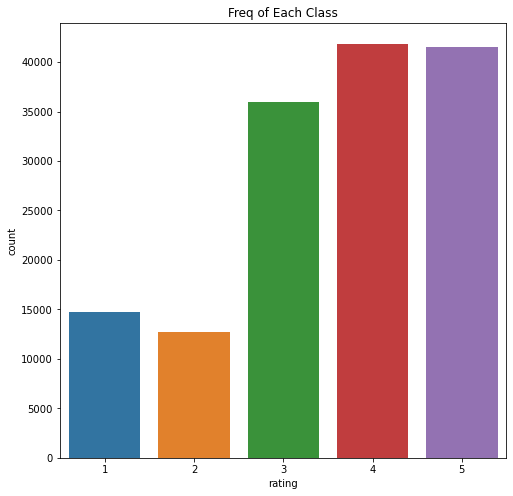

In [3]:
plt.figure(figsize=(8,8))
sns.countplot(train['rating'])
plt.title('Freq of Each Class')
plt.show()

Sebarann kelas pada data train sangat imballance sehingga akan sulit untuk mendapatkan hasil yang maksimal. Lalu coba cek kata" yang ada pada data train menggunakan `CountVectorizer`

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit_transform(train['review'])

<146811x60506 sparse matrix of type '<class 'numpy.int64'>'
	with 1742186 stored elements in Compressed Sparse Row format>

In [7]:
print(f'Banyak kata yang tersedia : {len(vectorizer.vocabulary_)}')

Banyak kata yang tersedia : 60506


In [8]:
words = pd.DataFrame({'words' : list(vectorizer.vocabulary_.keys()), 'Count' : list(vectorizer.vocabulary_.values())})
words = words.sort_values(by='Count', ascending=False)
words[:60]

,words,Count
51647,𝚠𝚛𝚊𝚙,60505
51650,𝚜𝚒𝚊𝚗𝚐,60504
51658,𝚜𝚎𝚜𝚞𝚊𝚒,60503
51655,𝚜𝚎𝚗𝚒𝚗,60502
51656,𝚜𝚊𝚖𝚙𝚊𝚒,60501
51653,𝚜𝚊𝚋𝚝𝚞,60500
51641,𝚛𝚊𝚙𝚒𝚑,60499
51649,𝚙𝚎𝚜𝚊𝚗,60498
51644,𝚙𝚊𝚔𝚊𝚒,60497
51651,𝚕𝚐𝚜,60496


Teradapat banyak kata bahasa indonesia & bahkan ada yang berbahasa China, Arab, Korea, dll yang akan menyebabkan masalah kehilangan feature saat `word tokenize` nantinya

## 4. Preprocess
Preprocess kalimat yang akan diolah, agar lebih mudah dikenali oleh komputer.

In [6]:
import nltk
nltk.download('punkt')

abbreviations = {
    "gajelas" : "very bad",
    "ga" : "no",
    "gk" : "no",
    "udh" : "already",
    "dteng" : "arrive",
    "lgi" : "again",
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
def preprocess(text):
    # Cleanning unreadable text
    text = ''.join([x for x in text if x in string.printable])
    
    # Cleaning Emoji's
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Remove String Punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert Abbrev
    convert_abbrev = lambda word : abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word
    tokens = word_tokenize(text)
    tokens = [convert_abbrev(word) for word in tokens]
    
    return ' '.join([x for x in tokens if len(x) > 1])

In [8]:
# Test fungsi
preprocess(train['review'][5001])

'Disappointed already long wait even that order Glitter arrive difference that instead arrive masks brand very bad again it hell'

In [9]:
clean_train = np.array(train['review'].apply(preprocess))
clean_test = np.array(test['review'].apply(preprocess))

## 5. Encode & Tokenize dengan Bert

In [10]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(max_length=maxlen)
    all_ids = []
    
    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

## 6. Build Keras Model
Membuat model yang akan di train

In [11]:
def build_model(transformer, loss='categorical_crossentropy', max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    x = tf.keras.layers.Dropout(0.35)(cls_token)
    x = Dense(256, activation='relu')(x)
    out = Dense(5, activation='softmax')(x)
    
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=3e-5), loss=loss, metrics=[tf.keras.metrics.AUC()])
    
    return model

## 7. Set strategy TPU

In [12]:
AUTO = tf.data.experimental.AUTOTUNE

# Create strategy from tpu
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
strategy = tf.distribute.experimental.TPUStrategy(tpu)

Setting Bert tokennizer

In [13]:
# First load the real tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

# Save the loaded tokenizer locally
save_path = '/kaggle/working/distilbert_base_uncased/'
if not os.path.exists(save_path):
    os.makedirs(save_path)
tokenizer.save_pretrained(save_path)

# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('distilbert_base_uncased/vocab.txt', lowercase=True)
fast_tokenizer

Tokenizer(vocabulary_size=30522, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=True, lowercase=True, wordpieces_prefix=##)

In [14]:
# Suffle dan Split Training Data
text, label = shuffle(clean_train, train['rating'].to_numpy(), random_state = 123)
text_train, text_valid, y_train, y_valid = train_test_split(text, to_categorical(label - 1), test_size=0.2, random_state = 123)

In [15]:
x_train = fast_encode(text_train, fast_tokenizer, maxlen=512)
x_valid = fast_encode(text_valid, fast_tokenizer, maxlen=512)
x_test = fast_encode(clean_test, fast_tokenizer, maxlen=512)

Ubah dataset ke Tensorflow dataset

In [16]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_train, y_train))
    .repeat()
    .batch(64)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_valid, y_valid))
    .batch(64)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(x_test)
    .batch(64)
)

In [17]:
from tensorflow.keras import backend as K

def focal_loss(gamma=2., alpha=.2):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss_fixed

Make model by TPU strategy

In [18]:
%%time
with strategy.scope():
    transformer_layer = transformers.TFBertModel.from_pretrained('bert-base-uncased')
    model = build_model(transformer_layer, loss=focal_loss(gamma=1.5), max_len=512)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 512)]             0         
_________________________________________________________________
tf_bert_model (TFBertModel)  ((None, 512, 768), (None, 109482240 
_________________________________________________________________
tf_op_layer_strided_slice (T [(None, 768)]             0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               196864    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 109,680,389
Trainable params: 109,680,389
Non-trainable params: 0
______________________________________________

## 8. Train Model

In [19]:
train_history = model.fit(
    train_dataset,
    steps_per_epoch=len(x_train)//64,
    validation_data=valid_dataset,
    epochs=10
)

Epoch 1/10
1835/1835 [==============================] - 398s 217ms/step - auc: 0.8292 - loss: 0.0458 - val_auc: 0.8518 - val_loss: 0.0434
Epoch 2/10
1835/1835 [==============================] - 378s 206ms/step - auc: 0.8593 - loss: 0.0426 - val_auc: 0.8542 - val_loss: 0.0431
Epoch 3/10
1835/1835 [==============================] - 379s 207ms/step - auc: 0.8747 - loss: 0.0407 - val_auc: 0.8478 - val_loss: 0.0443
Epoch 4/10
1835/1835 [==============================] - 382s 208ms/step - auc: 0.8900 - loss: 0.0386 - val_auc: 0.8442 - val_loss: 0.0449
Epoch 5/10
1835/1835 [==============================] - 385s 210ms/step - auc: 0.9038 - loss: 0.0365 - val_auc: 0.8323 - val_loss: 0.0471
Epoch 6/10
1835/1835 [==============================] - 386s 210ms/step - auc: 0.9156 - loss: 0.0344 - val_auc: 0.8256 - val_loss: 0.0517
Epoch 7/10
1835/1835 [==============================] - 384s 209ms/step - auc: 0.9244 - loss: 0.0327 - val_auc: 0.8299 - val_loss: 0.0518
Epoch 8/10
 476/1835 [======>.....

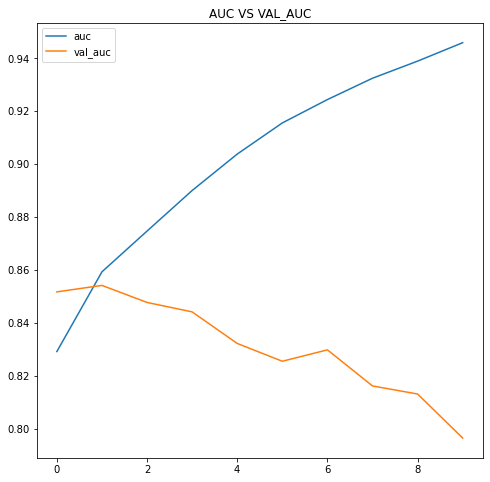

In [20]:
plt.figure(figsize=(8,8))
plt.plot(range(10), train_history.history['auc'], label='auc')
plt.plot(range(10), train_history.history['val_auc'], label='val_auc')
plt.title('AUC VS VAL_AUC')
plt.legend()
plt.show()

## 9. Make Prediction

In [21]:
pred = model.predict(test_dataset)
res = [np.argmax(x) + 1 for x in pred]
sub = pd.DataFrame({'review_id' : test['review_id'], 'rating' : res})
sub

,review_id,rating
0,1,3
1,2,2
2,3,5
3,4,4
4,5,4
...,...,...
60422,60423,5
60423,60424,2
60424,60425,4
60425,60426,4


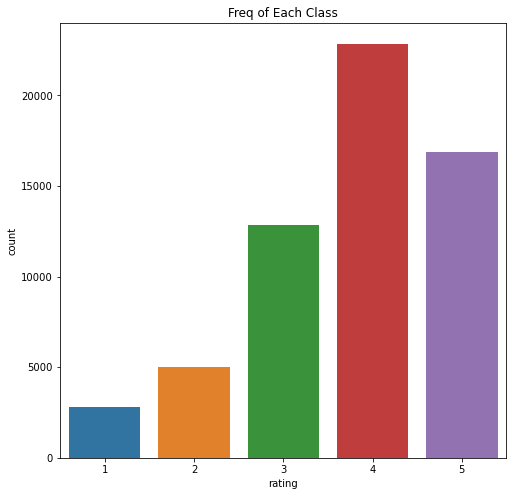

In [22]:
plt.figure(figsize=(8,8))
sns.countplot(sub['rating'])
plt.title('Freq of Each Class')
plt.show()

In [23]:
sub.to_csv('Submission.csv', index=False)